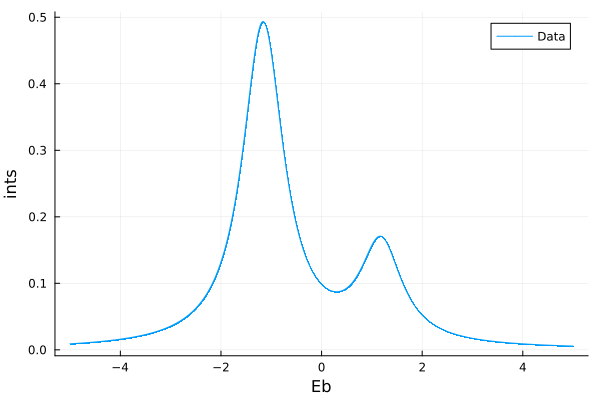

In [4]:
#UGa2
using LinearAlgebra
using Plots
using DelimitedFiles
#=
xpsのパラメータ設定に
Ucf = 1.8*Uff
を追加した
=#
t = 1
delta = 1
Ucf = 5
smalldelta = 0.5

Uff = Ucf/1.8
Hg =  [
   0 t
   t delta ]
Hf =  [
   0 t
   t delta - Ucf + Uff  ]
Eg,Vg = eigen(Hg)
Ef,Vf = eigen(Hf)
function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end
function F2(Eg,Vg,Ef,Vf,Eb)
    return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
 end
fp = open("xasoutput.dat","w")
for Eb in -5:0.001:5
    ints = (-1/pi)imag(F1(Eg[1],Vg,Ef[1],Vf,Eb) + F2(Eg[1],Vg,Ef[2],Vf,Eb))
    println(fp,Eb,",",ints)
end
close(fp)
# ファイルを読み取り
data = readdlm("xasoutput.dat",',')

# データを x と y に分割
x = data[:, 1]
y = data[:, 2]

# サイズの変更
x = x[:]
y = y[:]

# プロットを作成
plot(x, y, xlabel="Eb", ylabel="ints", label="Data", marker=:auto, markersize=0)